- 모델을 간단하게 만드는 가정-예시 존재(겉보기 날씨와 습도와 관련한 테니스 여부)

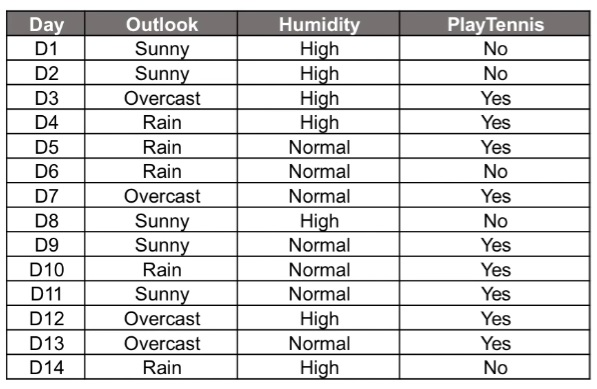

### 특정 겉보기 날씨와 습도가 고정되어 있다고 할 때 테니스를 칠 확률은?

## Naive bayes classifier
- 특정, 겉보기 날씨/습도가 고정되어 있다 할 때, 가지는 패턴은 2가지임
  - **날씨가 좋고 습도가 좋을 때 테니스를 안 치는 확률**
  - **날씨가 좋고 습도가 좋을 때 테니스를 치는 확률**
- 위의 둘의 합이 1이 되게 하는 패턴
  - **만약 날씨가 좋고 습도가 좋을 때 테니스를 치는 확률이 더 높다면 이후에도 테니스를 칠 확률이 높다.**
- 그렇다면 위의 패턴이 많기위한 조건은? 
  - 설명변수와 반응변수를 분리하여 생각하도록 함


1. 테니스 자체를 많이 치는 경우(반응변수 기준)
2. 테니스를 쳤을 때, 해당 겉보기 날씨와 습도가 자주 출현한 경우(설명변수 기준)

#### Naive bayes는 설명변수 간의 독립을 가정
- 테니스를 쳤을 때, 겉보기 날씨와 습도는 **서로 상관관계가 없음을 가정함**

## 수학적 개념 이해 - 조건부 확률

- B가 주어졌을 때 사건 A의 조건부 확률: $P(A|B)=\frac{P(A\cap B)}{P(B)}$
- *겉보기 날씨, 습도가 주어졌을 때(B), 테니스를 칠 확률(A)과 엮어서 생각*

- **베이즈 정리 정의**
  - $A_1,...,A_k$: 배반사건, $\cup_{i=1,...,K}A_i=S$일 때, (각각 입력변수의 교집합이 존재하지 않는다는 조건)
  - $P(A_i|B)=\frac{P(A_i \cap B)}{P(B)}=\frac{P(A_i \cap B)}{P(A_1 \cap B)+\dots+P(A_k \cap B)}=\frac{P(B|A_i)P(A_i)}{P(B|A_1)P(A_1)+\dots+P(B|A_K)P(A_K)}$

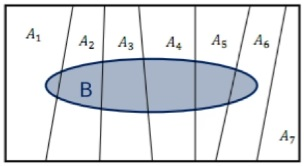

- Naive bayes classifier

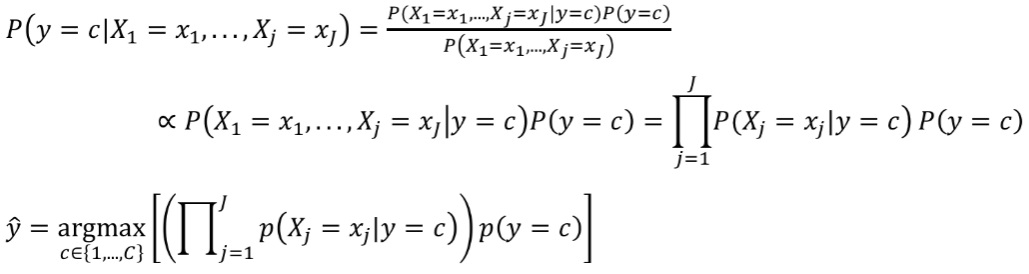

- 분모의 값은 항상 동일하게 나오기 때문에 분자의 경우만 살펴보겠다는 취지
- 분자의 값을 가장 크게하는 $c$가 우리가 원하는 $\hat{y}$값이라는 것

### 직관적인 케이스가 아닌 Bayes 정리를 통한 테니스 예측
- 겉보기 날씨가 좋고, 습도가 보통일 때 테니스를 치는 확률 구해보기

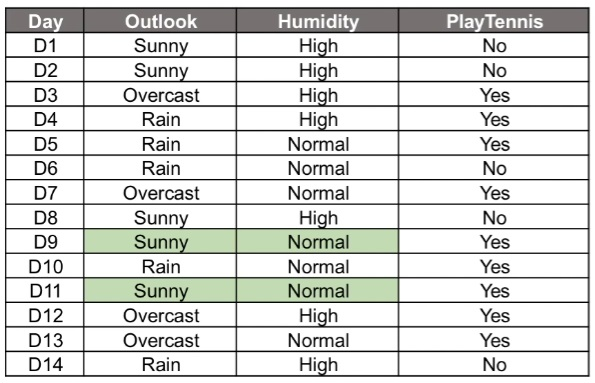

1. 베이즈 모델 적용
- $P=(YES|Sunny,Normal)=\frac{P(Yes,Sunny,Normal)}{P(Sunny,Normal)}=\frac{P(Yes,Sunny,Normal)}{P(Yes,Sunny,Normal)+P(No,Sunny,Normal)}=\frac{2/14}{2/14}$
- 실제 계산하는 과정에서 분모는 제거됨

2. 사전확률 적용
- $P(Yes|Sunny,Normal)=\frac{P(Sunny,Normal|Yes)P(YES)}{P(Sunny,Normal)}$
  - $P(Yes)=\frac{9}{14},P(Sunny,Normal|Yes)=\frac{2}{9}$
  - $P(Sunny,Normal|Yes)P(Yes)=\frac{9}{14}\times \frac{2}{9}=\frac{2}{14}$
  - $P(Sunny,Normal)=\frac{2}{14}$

3. 조건부 독립 적용
- $P(Yes|Sunny,Normal)=\frac{P(Sunny,Normal|Yes)P(YES)}{P(Sunny,Normal)}=\frac{P(Sunny|Yes)P(Normal|Yes)P(Yes)}{P(Sunny,Normal)}$
  - $P(Yes)=\frac{9}{14}$
  - $P(Sunny,Normal|Yes)=P(Sunny|Yes)P(Normal|Yes)=\frac{2}{9}\times\frac{6}{9}=\frac{4}{27}$
  - $P(Sunny,Normal|Yes)P(Yes)=P(Sunny|Yes)P(Normal|Yes)P(Yes)=\frac{4}{27}\times\frac{9}{14}=0.095$
  - $P(Sunny,Normal)=\frac{2}{14}=0.143$

4. No, Yes 중 확률이 더 큰 것을 선택 -> **분자의 비교**
- $P(Yes|Sunny,Normal)=\frac{P(Sunny|Yes)P(Normal|Yes)P(Yes)}{P(Sunny,Normal)}$
- $P(No|Sunny,Normal)=\frac{P(Sunny|No)P(Normal|No)P(No)}{P(Sunny,Normal)}$
  - $P(Sunny|No)P(Normal|No)P(No)=P(Sunny|Yes)P(Normal|Yes)P(Yes)=\frac{4}{27}\times\frac{9}{14}=0.095$
  - $P(Sunny|No)P(Normal|No)P(No)=P(Sunny|No)P(Normal|No)P(No)=\frac{3}{5}\times\frac{1}{5}\times\frac{5}{14}=0.043$

- **Yes의 확률이 더 높게 나왔기 때문에 Yes를 예측함**

## Naive bayes classifier 종류
- **Gaussian** : 설명변수가 **연속형**인 경우
- **Multinormial** : 설명변수가 **범주형**인 경우
  - **Bernoulli** : 설명변수가 **이분형**인 경우

- **Gaussian naive bayes classifier**

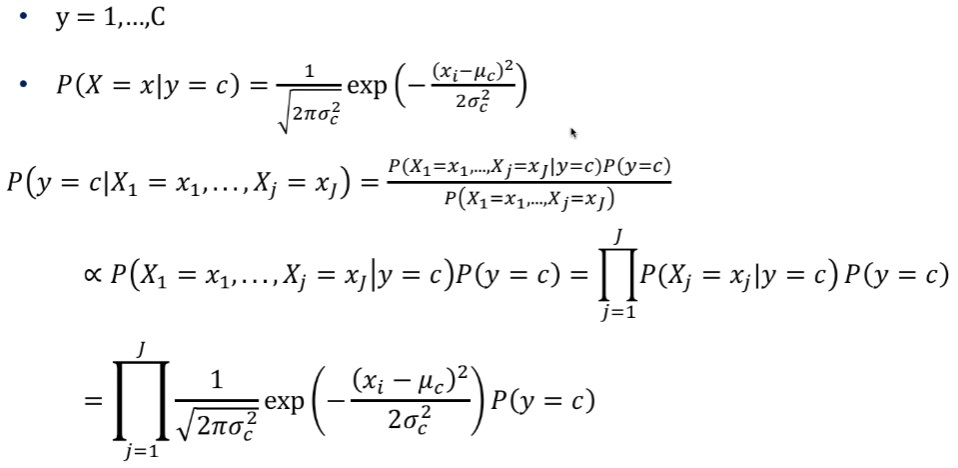

- **Multinormial naive bayes classifier**

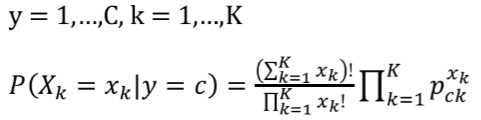

  - **Bernoulli naive bayes classifier**

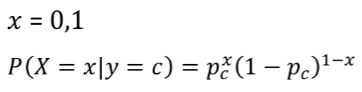

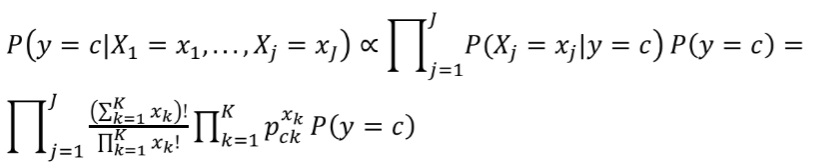

  - 위의 식을 만족하는 최대의 c를 찾아내는 방법이 naive bayes 방

## Naive Bayes 실습
### 1. Gaussian Naive Bayes

In [1]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [2]:
iris=datasets.load_iris()
df_X=pd.DataFrame(iris.data)
df_Y=pd.DataFrame(iris.target)

In [3]:
df_X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df_Y.head()

,0
0,0
1,0
2,0
3,0
4,0


- 모델 피팅

In [6]:
gnb=GaussianNB()
fitted=gnb.fit(iris.data,iris.target)
y_pred=fitted.predict(iris.data)

In [7]:
fitted.predict_proba(iris.data)[[1,48,51,100]]
#predict_probabillity : 3class -> 0,1,2일 확률로 총 3개가 존재

array([[1.00000000e+000, 1.51480769e-017, 2.34820051e-025],
       [1.00000000e+000, 2.63876217e-018, 2.79566024e-025],
       [7.27347795e-102, 9.45169639e-001, 5.48303606e-002],
       [3.23245181e-254, 6.35381031e-011, 1.00000000e+000]])

In [8]:
fitted.predict(iris.data)[[1,48,51,100]]

array([0, 0, 1, 2])

- Confusion Matrix 구하기

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
confusion_matrix(iris.target,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

- Prior 저장하기
  - 각 변수의 출현 확률을 알고 있다면, 가중치 설정도 가능

In [12]:
gnb2=GaussianNB(priors=[1/100,1/100,98/100])
fitted2=gnb2.fit(iris.data,iris.target)
y_pred2=fitted.predict(iris.data)
confusion_matrix(iris.target,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

## 2. Multinomial naive bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [16]:
X=np.random.randint(5,size=(6,100))
y=np.array([1,2,3,4,5,6])

In [17]:
X

array([[1, 0, 4, 3, 3, 3, 0, 2, 2, 4, 1, 0, 3, 4, 4, 0, 4, 3, 4, 2, 3, 4,
        2, 0, 3, 4, 2, 3, 2, 0, 4, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 0, 2,
        3, 1, 3, 3, 3, 4, 0, 0, 1, 2, 1, 2, 4, 1, 4, 4, 2, 3, 0, 3, 3, 0,
        4, 4, 1, 2, 0, 1, 3, 1, 4, 1, 3, 3, 2, 0, 1, 4, 1, 2, 4, 2, 3, 0,
        3, 3, 0, 4, 3, 4, 4, 1, 3, 3, 2, 4],
       [4, 3, 4, 3, 4, 4, 2, 3, 1, 2, 2, 3, 3, 2, 2, 1, 3, 1, 0, 2, 0, 0,
        1, 4, 4, 1, 3, 2, 0, 3, 3, 3, 2, 2, 1, 3, 1, 1, 3, 4, 3, 2, 2, 4,
        4, 1, 4, 1, 3, 1, 4, 3, 3, 3, 2, 4, 4, 2, 1, 0, 1, 4, 4, 3, 1, 2,
        3, 1, 0, 3, 3, 0, 1, 3, 0, 1, 3, 0, 4, 1, 2, 4, 4, 3, 0, 3, 2, 0,
        4, 2, 1, 3, 0, 4, 2, 2, 3, 4, 4, 4],
       [2, 3, 3, 4, 2, 1, 1, 1, 0, 1, 4, 2, 2, 1, 1, 1, 3, 0, 0, 2, 3, 4,
        0, 0, 3, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 4, 2, 3, 1, 3, 2,
        0, 0, 2, 2, 4, 0, 1, 1, 0, 4, 4, 4, 2, 0, 4, 2, 2, 1, 2, 2, 0, 3,
        4, 4, 1, 4, 1, 0, 2, 4, 2, 4, 0, 3, 4, 1, 1, 1, 3, 4, 2, 1, 3, 2,
        1, 2, 4, 1, 0,

In [18]:
y

array([1, 2, 3, 4, 5, 6])

- Multinomial naive bayes 생성

In [19]:
clf=MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [20]:
print(clf.predict(X[2:3]))

[3]


In [21]:
clf.predict_proba(X[2:3])

array([[7.92561278e-30, 5.61583623e-25, 1.00000000e+00, 2.23313283e-32,
        3.59464936e-38, 1.43533741e-27]])

- 2번째 관측치가 1~6번째에 각각 적중될 확률.

- prior 변경해보기(가중치)

In [24]:
clf2=MultinomialNB(class_prior=[0.1,0.1999,0.0001,0.1,0.1,0.1])
#2~3번째 확률만 바뀐 형태임
clf2.fit(X,y)

MultinomialNB(class_prior=[0.1, 0.1999, 0.0001, 0.1, 0.1, 0.1])

In [25]:
clf2.predict_proba(X[2:3])

array([[7.92561278e-27, 1.12260566e-21, 1.00000000e+00, 2.23313283e-29,
        3.59464936e-35, 1.43533741e-24]])